In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.cm import ScalarMappable
import numpy as np
import math
import random
%matplotlib inline

In [159]:
# list of dipole positions
rDs = []
nDs = []
ωs=[]
N = 51
dp= np.zeros(N)
dd = 2*np.pi*4/3.1
for iD in range(N):
    rD = np.array([(iD-N//2)*dd, 0, 0]) # dipole position
    nD = np.array([0, 0, 1])*np.exp(1j*(iD-N//2)*dd) # direction (unit vector)
    dp[iD]=(iD-N//2)*dd
    nD = nD/np.linalg.norm(nD)
    rDs.append(rD)
    nDs.append(nD)
Npoints = 51
xmax = 1000
coord = np.linspace(-xmax, xmax, Npoints)
xa, ya, za = np.meshgrid(coord,coord,coord, indexing="ij")
xx, zz = xa[:,Npoints//2,:], za[:,Npoints//2,:]

In [41]:
(iD-N//2)*dd

267.03537555513236

## Intensity at point $\vec{r}$ for a dipole aligned along the z-direction

In [26]:
idc = (1, 50, 1)
rD  = rDs[0]
nD  = nDs[0]

Rvec = [ xa[idc]-rD[0] , ya[idc]-rD[1] , za[idc]-rD[2] ]
R = np.linalg.norm(Rvec)
Runit = Rvec/R

cosΘ = np.dot(Runit, nD)
Θ = np.arccos( cosΘ )

In [27]:
ya[idc]

200.0

In [28]:
def Arad(kR,Θ,nD,kd):
    return (np.exp(1j*kR)/kR)* ( (np.cos(kd*np.cos(Θ)) - np.cos(kd) )/np.sin(Θ)**2 )*nD

In [29]:
def Agen(k,R,r,t):
    return  -1j*ω*μ*np.exp(1j*k*np.abs(R-r))/(4*np.pi*np.abs(R-r))

In [9]:
def Erad(Rhat,R,Θ,nD,kd):
    return -1j*np.cross(Rhat,np.cross(Rhat, Arad(kR,Θ,nD,kd)))

In [10]:
def Egen(Rhat,R,ϵ,ω,t,c):
    return 1/(4*np.pi*ϵ)*((3*Rhat*(np.dot(Rhat, np.cos(ω*t-R/c)))-np.cos(ω*t-R/c))/R**3
                       +(3*Rhat*(np.dot(Rhat, -ω*np.sin(ω*t-R/c)))+ω*np.sin(ω*t-R/c))/(c*R**2)
                       +(3*Rhat*(np.dot(Rhat, -ω**2 * np.cos(ω*t-R/c)))+ω**2 * np.cos(ω*t-R/c))/(c**2 * R))     

In [11]:
def Eret(Rhat,kR,nd,kd):
    return np.exp(1j*kR)/kR*(np.cross(np.cross(Rhat, kd*nd),Rhat)+(1/kR)*(1/kR-1j)*(3*Rhat*np.dot(Rhat,kd*nd)-kd*nd))

In [12]:
def Bret(Rhat,kR,nd,kd):
    return np.exp(1j*kR)/kR*(1-1/(1j*kR))*np.cross(Rhat, kd*nd)

In [13]:
kd = 1 # kd = 2pi*d/λ 

# Intensity in different directions

In [108]:
# directions

θlist = np.linspace(0,np.pi,7)
ϕlist = np.linspace(0,2*np.pi,8, endpoint=False)

#logR1 = np.log10 ( (N+1)*dd/2 )
logR1 = 3 # radiation zone
logR2 = 4
NR = 41
Rlist = np.logspace(logR1,logR2,NR)

In [103]:
Rlist

array([ 10000.        ,  10592.53725177,  11220.18454302,  11885.02227437,
        12589.25411794,  13335.21432163,  14125.37544623,  14962.35656094,
        15848.93192461,  16788.04018123,  17782.79410039,  18836.4908949 ,
        19952.62314969,  21134.89039837,  22387.21138568,  23713.73705662,
        25118.8643151 ,  26607.25059799,  28183.82931264,  29853.82618918,
        31622.77660168,  33496.54391578,  35481.33892336,  37583.74042884,
        39810.71705535,  42169.65034286,  44668.3592151 ,  47315.12589615,
        50118.72336273,  53088.4444231 ,  56234.13251903,  59566.2143529 ,
        63095.73444802,  66834.39175686,  70794.57843841,  74989.42093325,
        79432.82347243,  84139.51416452,  89125.09381337,  94406.08762859,
       100000.        ])

In [104]:
def get_intensity_R(θ, ϕ, Rlist, rDs):
    Inlist = []
    for R in Rlist:
        Efield = 1j*np.zeros(3)
        Bfield = 1j*np.zeros(3)
        for iD, rD in enumerate(rDs[:]):
                nD = nDs[iD]

                xx = R*np.sin(θ)*np.cos(ϕ)
                yy = R*np.sin(θ)*np.sin(ϕ)
                zz = R*np.cos(θ)

                Rvec = [ xx-rD[0] , yy-rD[1] , zz-rD[2] ] 
                Rvecnorm=np.linalg.norm(Rvec)
                Runit = Rvec/Rvecnorm
                Efield += Eret(Runit,Rvecnorm,nD,kd)
                Bfield += Bret(Runit,Rvecnorm,nD,kd)
        Inlist.append( np.linalg.norm( np.cross(Efield, Bfield) ) )
    return Inlist

In [82]:
θ = np.pi/2
ϕ = 0*np.pi/2 

Inlist = get_intensity_R(θ, ϕ, Rlist, rDs)

In [83]:
np.pi/2

1.5707963267948966

In [84]:
coeffs = np.polyfit(np.log(Rlist),np.log(Inlist),deg=1)

In [85]:
coeffs

array([-2.00005095, -0.48607026])

In [86]:
poly = np.poly1d(coeffs)

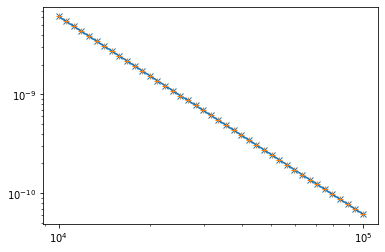

In [87]:
plt.loglog(Rlist, Inlist,'x-')
plt.loglog(Rlist, np.exp(poly(np.log(Rlist))),'+')

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 34.1 µs
θ = 0.0, ϕ=0.0, a = -4.746650596032296
θ = 0.0, ϕ=0.25, a = -4.746650596032296
θ = 0.0, ϕ=0.5, a = -4.746650596032296
θ = 0.0, ϕ=0.75, a = -4.746650596032296
θ = 0.0, ϕ=1.0, a = -4.746650596032296
θ = 0.0, ϕ=1.2, a = -4.746650596032296
θ = 0.0, ϕ=1.5, a = -4.746650596032296
θ = 0.0, ϕ=1.8, a = -4.746650596032296
θ = 0.17, ϕ=0.0, a = -2.7537141167070027
θ = 0.17, ϕ=0.25, a = -3.4524650598452484
θ = 0.17, ϕ=0.5, a = -2.9440674967099345
θ = 0.17, ϕ=0.75, a = -3.9417853866460235
θ = 0.17, ϕ=1.0, a = -3.27679880150277
θ = 0.17, ϕ=1.2, a = -3.9417853866464805
θ = 0.17, ϕ=1.5, a = -2.9440674967102214
θ = 0.17, ϕ=1.8, a = -3.452465059845729
θ = 0.33, ϕ=0.0, a = -1.2068546981847141
θ = 0.33, ϕ=0.25, a = -1.2177094772855428
θ = 0.33, ϕ=0.5, a = -2.911426211304493
θ = 0.33, ϕ=0.75, a = -4.369180831234027
θ = 0.33, ϕ=1.0, a = -2.5023768473764387
θ = 0.33, ϕ=1.2, a = -4.369180831233781
θ = 0.33, ϕ=1.5, a = -2.9114262113046427
θ = 0

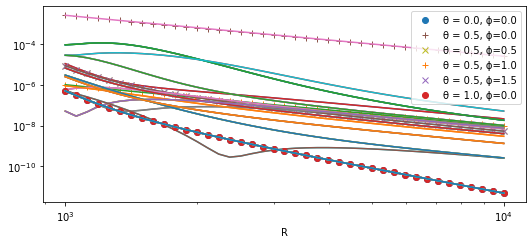

In [160]:
%time
for θ in θlist:
    for ϕ in ϕlist:
        Inlist = get_intensity_R(θ, ϕ, Rlist, rDs)
        if θ==np.pi/2 and ϕ == 0:
            plt.plot(Rlist,Inlist,'+',label=f'θ = {θ/np.pi:.2}, ϕ={ϕ/np.pi:.2}')
        if θ==np.pi/2 and ϕ == np.pi:
            plt.plot(Rlist,Inlist,'+',label=f'θ = {θ/np.pi:.2}, ϕ={ϕ/np.pi:.2}')
        if θ==np.pi/2 and ϕ == np.pi/2:
            plt.plot(Rlist,Inlist,'x',label=f'θ = {θ/np.pi:.2}, ϕ={ϕ/np.pi:.2}')
        if θ==np.pi/2 and ϕ == 3*np.pi/2:
            plt.plot(Rlist,Inlist,'x',label=f'θ = {θ/np.pi:.2}, ϕ={ϕ/np.pi:.2}')
        if θ==0 and ϕ == 0:
            plt.plot(Rlist,Inlist,'o',label=f'θ = {θ/np.pi:.2}, ϕ={ϕ/np.pi:.2}')
        if θ==np.pi and ϕ == 0:
            plt.plot(Rlist,Inlist,'o',label=f'θ = {θ/np.pi:.2}, ϕ={ϕ/np.pi:.2}')
        else:
            plt.plot(Rlist,Inlist)
        
        coeffs = np.polyfit(np.log(Rlist),np.log(Inlist),deg=1)
        print(f'θ = {θ/np.pi:.2}, ϕ={ϕ/np.pi:.2}, a = {coeffs[0]}')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel("R");

In [139]:
%%time
#Afield = np.zeros((*xx.shape,3),dtype=complex)
#Agenf= np.zeros((*xx.shape,3),dtype=complex)
Eretfield=np.zeros((*xx.shape,3),dtype=complex)
Bretfield=np.zeros((*xx.shape,3),dtype=complex)
#Efield= np.zeros((*xx.shape,3),dtype=complex)
#Egenf= np.zeros((*xx.shape,3),dtype=complex)
In=np.zeros(xx.shape,dtype=float)
for ii in range(Npoints):
    for kk in range(Npoints):
        for iD, rD in enumerate(rDs[:]):
            nD = nDs[iD]
            Rvec = [ xx[ii,kk]-rD[0] , 2*np.pi-rD[1] , zz[ii,kk]-rD[2] ] 
            R = np.linalg.norm(Rvec)
            Runit = Rvec/R
            #cosΘ = np.dot(Runit, nD)
            #Θ = np.arccos( cosΘ )
            #Afield[ii,kk,:] += Arad(R,Θ,nD,kd)
            #Agenf+=Agen(Runit,Runit,R,I) 
            #Efield[ii,kk,:] += Erad(Runit,R,Θ,nD,kd)
            Eretfield[ii,kk,:] += Eret(Runit,R,nD,kd)
            Bretfield[ii,kk,:] += Bret(Runit,R,nD,kd)
        In[ii,kk]=np.linalg.norm(np.cross(Eretfield[ii,kk,:], Bretfield[ii,kk,:]))



CPU times: user 19.4 s, sys: 180 ms, total: 19.6 s
Wall time: 19.4 s


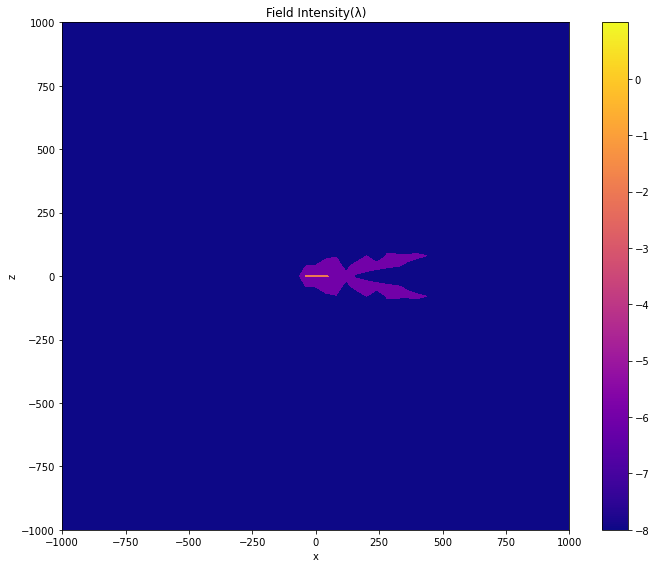

In [140]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax = 1# np.max(np.log(In))
fig, ax = plt.subplots(1,1,figsize=(10,8))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)
fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=np.arange(vmin, vmax, 1)
)
#for i in range(N):
#    circ = plt.Circle((dp[i],0), radius=0.6, color='w')
#    ax.add_patch(circ)
    
ax.set_title('Field Intensity(λ)')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_aspect('equal')
pass;

In [577]:
import os

In [578]:
os.chdir('/Users/cosmos/Desktop/graduation-project-1/dipoles_figures')

In [579]:
pwd()

'/Users/cosmos/Desktop/graduation-project-1/dipoles_figures'

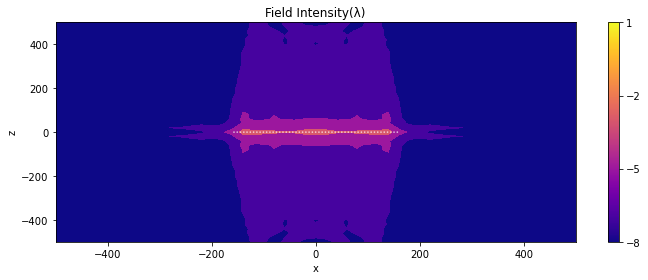

In [1419]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1



fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.6, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(λ)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesimx(λ).pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()


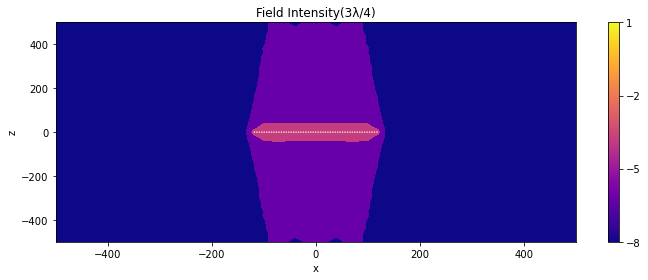

In [1433]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.6, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(3λ/4)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_2x.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()


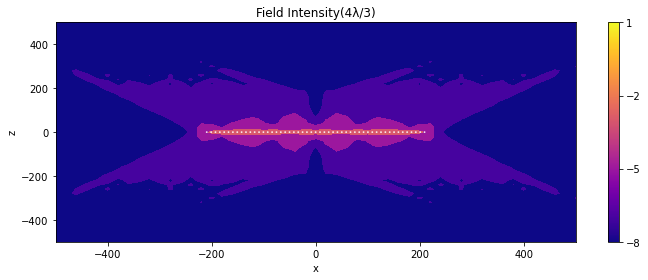

In [1286]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.9, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(4λ/3)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_3.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()

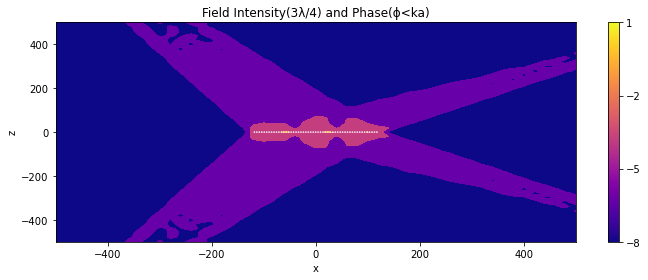

In [1436]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.8, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(3λ/4) and Phase(ϕ<ka)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_p11x.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()

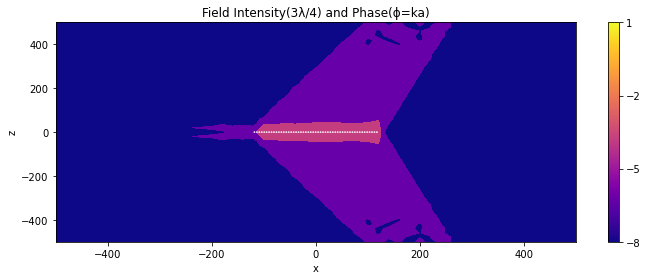

In [1439]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.9, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(3λ/4) and Phase(ϕ=ka)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_p12x.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()

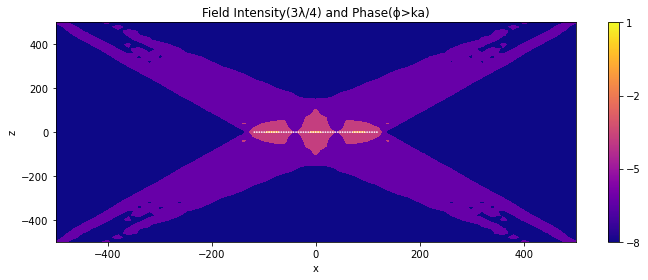

In [1442]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.9, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(3λ/4) and Phase(ϕ>ka)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_p13x.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()

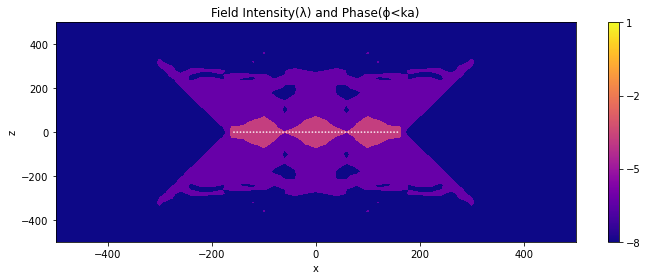

In [1424]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.8, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(λ) and Phase(ϕ<ka)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_p21x.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()

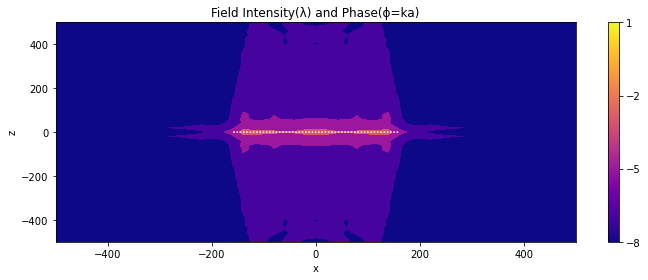

In [1427]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.9, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(λ) and Phase(ϕ=ka)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_p22x.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()

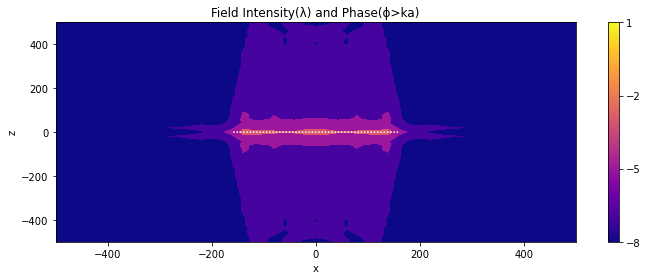

In [1430]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.9, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(λ) and Phase(ϕ>ka)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_p23x.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()

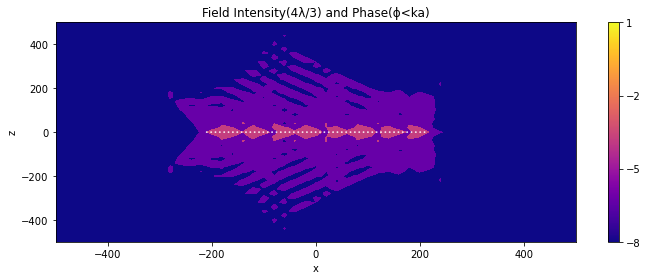

In [1450]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.9, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(4λ/3) and Phase(ϕ<ka)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_p31x.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()

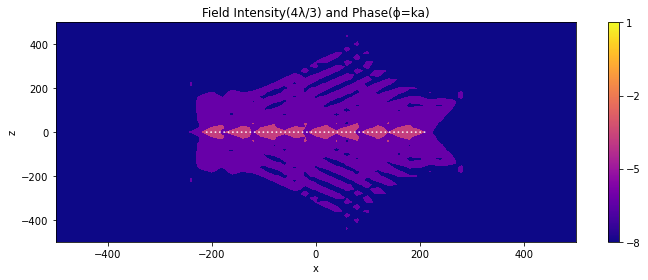

In [1446]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.9, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(4λ/3) and Phase(ϕ=ka)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_p32x.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()

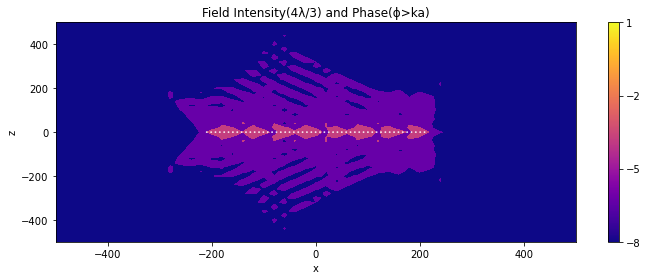

In [1453]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.9, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(4λ/3) and Phase(ϕ>ka)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_p33.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()

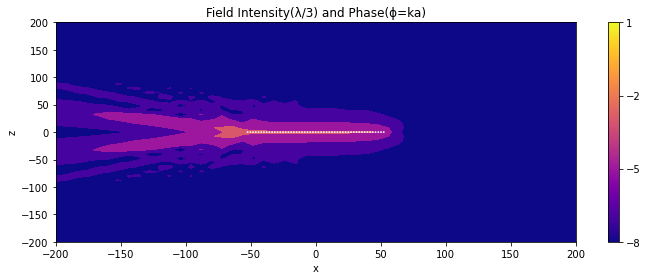

In [1472]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.4, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(λ/3) and Phase(ϕ=ka)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_pS1x.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()

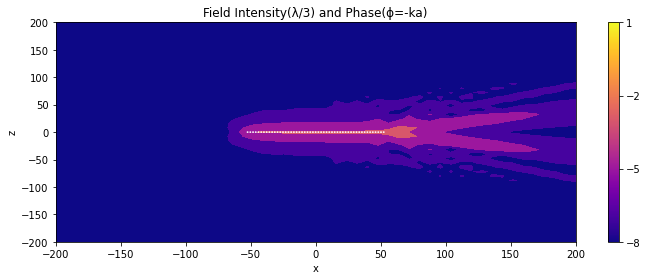

In [1475]:
plt.rcParams["figure.figsize"] = [7.50,3.50]
plt.rcParams["figure.autolayout"] = True
vmin = -8
vmax =1

fig, ax = plt.subplots(1,1,figsize=(10,4))
qcs =ax.contourf(xx, zz, np.log(In),cmap=cm.plasma, vmin=vmin, vmax=vmax)

fig.colorbar(
   cm.ScalarMappable(norm=qcs.norm, cmap=qcs.cmap),
   ticks=range(vmin, vmax+3, 3)
)
for i in range(N):
    circ = plt.Circle((dp[i],0), radius=0.4, color='w')
    ax.add_patch(circ)
ax.set_title('Field Intensity(λ/3) and Phase(ϕ=-ka)')
ax.set_xlabel('x')
ax.set_ylabel('z')

fig.savefig('dipolesim_pS2x.pdf', bbox_inches = "tight", pad_inches = 0.1 )
plt.show()